In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from RLGlue.rl_glue import RLGlue

from src.environment import Environment
from src.agents import Agent
import matplotlib.pyplot as plt

In [43]:

data = pd.read_csv("./data/all_data.csv").to_dict() # full data with price and sentiment
num_obs = max([k for k in data['Date'].keys()])

env = Environment
agent = Agent

env_info = {'max' : num_obs , 'data':data}
agent_info = {'model' : pd.read_csv("./data/all_data_with_sentiment.csv").to_dict(), 'cash':100000, 'crypto': ['BNB','BTC','ETH']}


rl_glue = RLGlue(env, agent)  # Creates a new RLGlue experiment with the env and agent we chose 
rl_glue.rl_init(agent_info, env_info) # Pass RLGlue what it needs to initialize the agent and environment
rl_glue.rl_start() 

((0.0,
  array([[37537.92773438,    61.92818451,  1656.72210693],
         [38702.19921875,    70.29411697,  1697.82214355],
         [39076.81640625,    70.72937012,  1645.91674805],
         [42541.64648438,    74.17855072,  1680.1295166 ],
         [46333.04882812,    93.85314941,  1757.48059082],
         [45693.97265625,   118.72285461,  1756.14160156],
         [46404.02148438,   126.86974716,  1763.75610352],
         [47690.94335938,   130.55391312,  1813.51086426],
         [47298.359375  ,   135.19033813,  1829.04833984],
         [47915.8984375 ,   134.95014191,  1809.72821045],
         [48320.796875  ,   132.92233276,  1792.23388672],
         [48572.1640625 ,   129.89822388,  1780.00653076],
         [50678.14257812,   147.37512207,  1814.9041748 ],
         [51910.38476562,   180.4757309 ,  1892.82775879],
         [53782.05664062,   264.30194092,  1949.5123291 ],
         [55993.42773438,   294.43609619,  1939.71850586],
         [56804.25585938,   274.23143005,  1927.1

In [44]:
num_steps = 100
total_nupl = []
actions = np.zeros(3)
for i in range(num_steps):
        reward, obs, action, done = rl_glue.rl_step()
        print("iteration:",i)
        print("Total NUPL:", reward)
        print("New observation:", obs[0], obs[1])
        print("Agent Portfolio:", action[0])
        print("Action taken:", action[1])

        total_nupl.append(reward)
        actions = np.vstack((actions,action[1]))
        if done:
                break


iteration: 0
Total NUPL: 2854542399.3216114
New observation: [55416.28125, 286.3909606933594, 1833.82763671875] [53548.54296875, 266.9293518066406, 1851.5984497070312]
Agent Portfolio: {'BNB': [(0.665993077106025, 37537.927734375)], 'BTC': [(403.6934103284555, 61.928184509277344)], 'ETH': [(15.09003827218325, 1656.7221069335938)]}
Action taken: [0, 0, 0]
iteration: 1
Total NUPL: 3057188675.500251
New observation: [56884.150390625, 284.1499481201172, 1812.1144409179688] [55416.28125, 286.3909606933594, 1833.82763671875]
Agent Portfolio: {'BNB': [(0.665993077106025, 37537.927734375)], 'BTC': [(403.6934103284555, 61.928184509277344)], 'ETH': [(15.09003827218325, 1656.7221069335938)]}
Action taken: [0, 0, 0]
iteration: 2
Total NUPL: 3221979763.1693764
New observation: [57576.654296875, 276.84246826171875, 1799.3245849609375] [56884.150390625, 284.1499481201172, 1812.1144409179688]
Agent Portfolio: {'BNB': [(0.665993077106025, 37537.927734375)], 'BTC': [(403.6934103284555, 61.92818450927734

In [45]:
time = [t for t in range(actions.shape[0])]

real_BNB = [data['BNB'][value] for value in data['BNB']][32:133]
real_BTC = [data['BTC'][value] for value in data['BTC']][32:133]
real_ETH = [data['ETH'][value] for value in data['ETH']][32:133]

action_BNB = np.where(actions[:,1]==2,-1,actions[:,1])
action_BTC = np.where(actions[:,0]==2,-1,actions[:,0])
action_ETH = np.where(actions[:,2]==2,-1,actions[:,2])

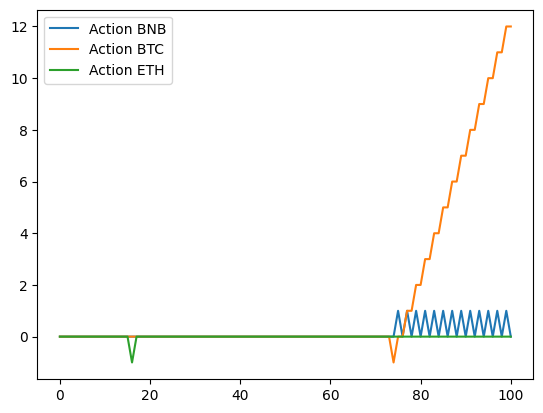

In [46]:
plt.plot(time,np.cumsum(action_BNB), label = 'Action BNB')
plt.plot(time,np.cumsum(action_BTC), label = 'Action BTC')
plt.plot(time,np.cumsum(action_ETH), label = 'Action ETH')
plt.legend()

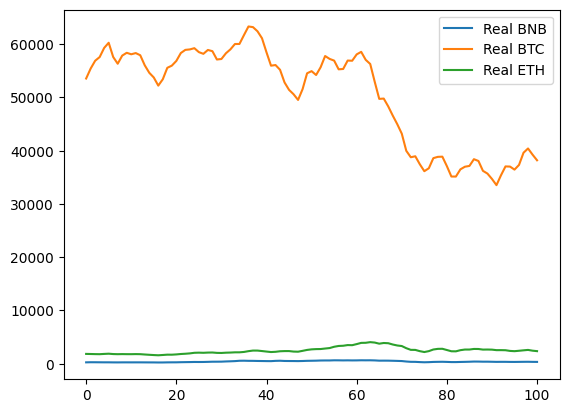

In [47]:
plt.plot(time,real_BNB, label = 'Real BNB')
plt.plot(time,real_BTC, label = 'Real BTC')
plt.plot(time,real_ETH, label = 'Real ETH')
plt.legend()